# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 10. Анализ вакансий.


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds24_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb` и полученные данные** (подробности далее). Если вы строите интерактивные графики, их стоит прислать в формате html.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Будьте внимательны при работе со сбором данных. Ответственность за корректность ваших действий лежит на вас. Не нагружайте сервера, *делайте паузы между запросами*. Как следствие, начинайте выполнять задание заранее. **Если вас где-то забаннили и т.п., то это не является уважительной причиной продления дедлайна.**
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*


---

**Баллы за задание:**

<b><a href="#Сложная-часть" style="text-decoration: none;"><font color="orange">Сложная часть</font></a></b> (учитывается только в основной части курса, необходимо на "отл"):
* Задача 1 &mdash; 70 баллов

<b><a href="#Факультативная-часть" style="text-decoration: none;"><font color="green">Факультативная часть</font></a></b> (учитывается только в факультативной части курса):
* Задача 2 &mdash; 30 баллов
* Задача 3 &mdash; 70 баллов

**Внимание!** Указанные баллы являются бонусными. Они не учитываются в максимальных суммах баллов в знаменателе при вычислении процента выполненных заданий. Но все полученные вами баллы будут учтены в числителе. Тем самым, выполняя или не выполняя домашку, вы не сможете понизить оценку, но сможете ее повысить.

In [ ]:
# Bot check

# HW_ID: fpmi_ad10
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [ ]:
import requests
from time import sleep
import json

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", font_scale=1.3, palette="Set2")


Второй курс &mdash; самое время задуматься о будущей профессии и проанализировать существующие предложения. Дело тут даже не в том, чтобы найти интересную стажировку. В первую очередь сейчас стоит подумать о том, в какую сторону развиваться дальше. Например, если вы хотите работать в какой-либо конкретной профессии, то наверняка стоит развивать какие-то определенные навыки, и даже выбрать подходящую кафедру. Анализ существующих вакансий поможет определить, какие навыки вам нужны.

**Внимание!**
В первую очередь задание призвано помочь вам понять, какие навыки стоит развивать, и может быть даже выбрать подходящую кафедру. Однако, не стоит идти на работу/стажировку раньше времени. Даже только летнюю, абсолютное большинство людей не могут работать круглый год без перерыва. У всех из вас 3 курс достаточно нагруженный, а на DS-потоке нагрузка с первой недели сентября. И если вы идете на стажировку, то каникул у вас может просто не остаться. Даже если вам сейчас/летом/в сентябре кажется "я же справлюсь", к ноябрю-декабрю с большой вероятностью вы выдохнетесь. Таких примеров *очень много*. Не все, кто-то успешно справляется совмещать работу и учебу, но таких *очень мало*. Берегите себя и свое здоровье :)

---

Задание предполагает вариативность исследуемых данных. Вы можете выбрать один из следующих вариантов.
1. Стандартный вариант &mdash; проанализировать вакансии на сайте <a target="_blank" href="https://hh.ru/">hh.ru</a> с использованием <a target="_blank" href="https://dev.hh.ru/">официального API</a>. Далее приведен пример работы с этим API. *Если вы не достаточно уверены в своих силах, рекомендуется выбрать этот вариант.*
2. Разобраться с API других сервисов по поиску вакансий, например, <a target="_blank" href="https://career.habr.com/">Хабр.Карьера</a> или <a target="_blank" href="https://www.superjob.ru/">SuperJob</a>.
3. Извлечение данных с помощью <a target="_blank" href="https://miptstats.github.io/courses/ad_fivt/data_parsing.html#2.-Парсинг-HTML-напрямую">парсинга HTML напрямую</a> некоторых сайтов. Например, вы можете попробовать напрямую распарсить пул вакансий из тех источников, которые не предоставляют API. **Внимание! Обращайте внимание на пользовательские соглашения и на <a target="_blank" href="https://miptstats.github.io/courses/ad_fivt/data_parsing.html#Сбор-данных-из-открытых-источников">эти рекомендации</a>.**
4. Комбинирование нескольких подходов. В этом случае нужно понимать, как находить одинаковые вакансии из разных источников для избежания их двойного учета.
5. Можно также *дополнительно* брать архивные данные из недавнего прошлого, например, из <a target="_blank" href="https://boosters.pro/championship/HeadHunter/overview/description">этого соревнования</a>.

Перед выполнением задания ознакомьтесь с <a target="_blank" href="https://miptstats.github.io/courses/ad_fivt/data_parsing.html">материалом</a> о сборе данных из открытых источников.

Для получения максимального балла за задание достаточно выполнить все задание по стандартному варианту. Альтернативные варианты, даже более сложные, не дают больше баллов, чем максимальное количество баллов по стандартному варианту.

Работа в некоторой степени творческая, поэтому конкретные детали решения в основном остаются на усмотрение автора решения. Например, если в вакансии зарплата укзана "*от ...*" или  "*до ...*", то вы сами решаете, как это обрабатывать, но не забывайте про четкую аргументацию. Не забывайте также заглядывать в презентацию по выполнению и оформлению домашних заданий с занятия 2.

 ---
### Справка по работе с API сервиса hh.ru.   

<b><font color="red">Внимание!</font> При работе с API не забывайте делать паузы между запросами, чтобы не задудосить сервер. Если вас заблокируют, это не будет являться уважительной причиной переноса дедлайна.</b>

Мы будем работать только с вакансиями. Для этого не требуется регистрироваться и получать токен. Ниже приведен краткий пример работы с API. Подробное описание работы с вакансиями, включая параметры запросов и формат ответа можно почитать в <a target="_blank" href="https://github.com/hhru/api/blob/master/docs/vacancies.md#search">документации</a>.

Например, мы хотим найти вакансии по запросу `Data Scientist` в Москве. Тогда первую страницу поиска из 10 вакансий на страницу мы можем получить с запроса к API:

In [ ]:
URL = "https://api.hh.ru/vacancies"

params = {
    "text": "Data Scientist",
    "area": 1,
    "page": 0,
    "per_page": 10,
}

req = requests.get(URL, params)
data = json.loads(req.content.decode())

Если все прошло успешно, полученный словарь будет иметь следующие ключи

In [ ]:
data.keys()

dict_keys(['items', 'found', 'pages', 'page', 'per_page', 'clusters', 'arguments', 'fixes', 'suggests', 'alternate_url'])

Можем посмотреть на краткое описание первой вакансии

In [ ]:
data["items"][0]

{'id': '99315095',
 'premium': False,
 'name': 'Стажер - Data Scientist',
 'department': None,
 'has_test': False,
 'response_letter_required': False,
 'area': {'id': '1', 'name': 'Москва', 'url': 'https://api.hh.ru/areas/1'},
 'salary': None,
 'type': {'id': 'open', 'name': 'Открытая'},
 'address': None,
 'response_url': None,
 'sort_point_distance': None,
 'published_at': '2024-05-17T17:58:10+0300',
 'created_at': '2024-05-17T17:58:10+0300',
 'archived': False,
 'apply_alternate_url': 'https://hh.ru/applicant/vacancy_response?vacancyId=99315095',
 'show_logo_in_search': None,
 'insider_interview': None,
 'url': 'https://api.hh.ru/vacancies/99315095?host=hh.ru',
 'alternate_url': 'https://hh.ru/vacancy/99315095',
 'relations': [],
 'employer': {'id': '5884778',
  'name': 'Эр-1',
  'url': 'https://api.hh.ru/employers/5884778',
  'alternate_url': 'https://hh.ru/employer/5884778',
  'logo_urls': {'original': 'https://img.hhcdn.ru/employer-logo-original/1077419.jpg',
   '240': 'https://im

Сколько всего найдено вакансий

In [ ]:
data["found"]

384

Количество страниц в результатах поиска

In [ ]:
data["pages"]

39

Из результатов можем сделать удобную таблицу, причем в дальнейшем можно оставить только те колонки, которые необходимы для анализа.

In [ ]:
df = pd.json_normalize(data["items"])
df.head()

id  premium                     name  department  has_test  \
0  99315095    False  Стажер - Data Scientist         NaN     False   
1  97644296    False           Data Scientist         NaN     False   
2  98785809    False           Data Scientist         NaN     False   
3  99236800    False          Quality Manager         NaN     False   
4  98823561    False           Data Scientist         NaN     False   

   response_letter_required salary  address response_url sort_point_distance  \
0                     False   None      NaN         None                None   
1                     False   None      NaN         None                None   
2                     False   None      NaN         None                None   
3                     False   None      NaN         None                None   
4                     False   None      NaN         None                None   

   ... address.metro.line_id address.metro.lat  address.metro.lng  \
0  ...                   NaN               NaN                NaN   
1  ...                     5         55.775672          37.654772   
2  ...                     2         55.838978          37.487515   
3  ...                     2         55.818923          37.497791   
4  ...                   NaN               NaN                NaN   

                              address.metro_stations address.id branding.type  \
0                                                NaN        NaN           NaN   
1  [{'station_name': 'Комсомольская', 'line_name'...     187581        MAKEUP   
2  [{'station_name': 'Водный стадион', 'line_name...    2486949        MAKEUP   
3  [{'station_name': 'Войковская', 'line_name': '...     147118           NaN   
4                                                NaN        NaN           NaN   

  branding.tariff     department.id department.name address.metro  
0             NaN               NaN             NaN           NaN  
1             NaN               NaN             NaN           NaN  
2             NaN               NaN             NaN           NaN  
3             NaN               NaN             NaN           NaN  
4             NaN  866666-866666-IT      BetBoom.IT           NaN  

[5 rows x 72 columns]

Для получения полного описания вакансии потребуется задать отдельный запрос, используя ее `id`.

In [ ]:
vacancy = df["id"].iloc[0]
vacancy_url = f"https://api.hh.ru/vacancies/{vacancy}"

req = requests.get(vacancy_url)
vacancy_info = json.loads(req.content.decode())

In [ ]:
vacancy_info

{'id': '99315095',
 'premium': False,
 'billing_type': {'id': 'standard', 'name': 'Стандарт'},
 'relations': [],
 'name': 'Стажер - Data Scientist',
 'insider_interview': None,
 'response_letter_required': False,
 'area': {'id': '1', 'name': 'Москва', 'url': 'https://api.hh.ru/areas/1'},
 'salary': None,
 'type': {'id': 'open', 'name': 'Открытая'},
 'address': None,
 'allow_messages': True,
 'experience': {'id': 'noExperience', 'name': 'Нет опыта'},
 'schedule': {'id': 'remote', 'name': 'Удаленная работа'},
 'employment': {'id': 'probation', 'name': 'Стажировка'},
 'department': None,
 'contacts': None,
 'description': '<p><strong>R1</strong> — это новый взгляд на пространство, в котором живет человек. Наша команда убеждена, что технологии способны сделать дом многофункциональным, удобным и универсальным как для семейных вечеров, так и для работы днем. Наша миссия — делать технологии понятными и доступными, чтобы каждый человек мог качественно улучшить свою жизнь, сделать собственный д

---

### <font color="orange"><i>Сложная часть</i></font>

 ---
### Задача 1.   

Исследуем профессию Data Scientist. Найдите как можно больше вакансий по этой профессии в Москве. Учтите, что имеет смысл искать также по другим ключевым словам, например, `аналитик данных`.

In [ ]:
import time
import requests
import json

URL = "https://api.hh.ru/vacancies"
vacancies = []
# req = requests.get(URL, params)
# data = req.json()

# Теперь можем получить количество страниц в результате
# total_pages = data['pages']
def Getter(query_text):
  # req = requests.get(URL, params)
  # data = req.json()
  # req = requests.get(URL, params)

  for page in range(10):  # Цикл по количеству страниц (максимум 10)
    params = {
        "text": query_text,
        "area": 1,
        "page": page,
        "per_page": 100
    }
    req = requests.get(URL, params)
    data = json.loads(req.content.decode())
    vacancies.extend(data['items'])
    if page >= data['pages'] - 1:  # Проверяем, есть ли еще страницы
        break
    time.sleep(0.05)  # Пауза между запросами

Getter("Аналитик данных OR Data Analyst OR Специалист по анализу данных OR Data Analysis Specialist")
Getter("Аналитик больших данных OR Big Data Analyst OR Специалист по машинному обучению OR Machine Learning Specialist")


39

In [ ]:
data = pd.json_normalize(vacancies)
print(data.shape)
data.head()
# print(data.shape)

(2000, 79)


id  premium                                               name  \
0  97980711    False  Операционный маркетолог в отдел трафика и конв...   
1  99038402    False  Ведущий специалист отдела безопасности, "Транс...   
2  99423201    False               Заместитель начальника отдела кадров   
3  99119800    False                         Вице-президент по финансам   
4  98957420    False                          Junior Python разработчик   

   department  has_test  response_letter_required  address response_url  \
0         NaN     False                     False      NaN         None   
1         NaN     False                     False      NaN         None   
2         NaN     False                     False      NaN         None   
3         NaN     False                     False      NaN         None   
4         NaN     False                     False      NaN         None   

  sort_point_distance              published_at  ... branding.tariff  \
0                None  2024-04-26T11:32:10+0300  ...             NaN   
1                None  2024-05-15T13:08:32+0300  ...             NaN   
2                None  2024-05-18T18:21:17+0300  ...             NaN   
3                None  2024-05-16T09:24:00+0300  ...             NaN   
4                None  2024-05-17T18:16:13+0300  ...            None   

   address.metro.station_name address.metro.line_name  \
0                         NaN                     NaN   
1                         NaN                     NaN   
2                         NaN                     NaN   
3                         NaN                     NaN   
4                         NaN                     NaN   

  address.metro.station_id  address.metro.line_id address.metro.lat  \
0                      NaN                    NaN               NaN   
1                      NaN                    NaN               NaN   
2                      NaN                    NaN               NaN   
3                      NaN                    NaN               NaN   
4                      NaN                    NaN               NaN   

  address.metro.lng employer.logo_urls insider_interview.id  \
0               NaN                NaN                  NaN   
1               NaN                NaN                  NaN   
2               NaN                NaN                  NaN   
3               NaN                NaN                  NaN   
4               NaN                NaN                  NaN   

  insider_interview.url  
0                   NaN  
1                   NaN  
2                   NaN  
3                   NaN  
4                   NaN  

[5 rows x 79 columns]

В полученную выборку некоторые вакансии могли попасть несколько раз. Удалите дубликаты.

In [ ]:
# Удаляем дубликаты по столбцу "id"
data.drop_duplicates(subset="id", inplace=True)

# Выводим размерность DataFrame и первые несколько строк
print(data.shape)
data

(1612, 79)


id  premium                                               name  \
0     97980711    False  Операционный маркетолог в отдел трафика и конв...   
1     99038402    False  Ведущий специалист отдела безопасности, "Транс...   
2     99119800    False                         Вице-президент по финансам   
3     98957420    False                          Junior Python разработчик   
4     94048271    False                                 Системный аналитик   
...        ...      ...                                                ...   
1995  96505051    False  Бренд-менеджер/Менеджер группы брендов (бренд ...   
1996  97320720    False  Python Developer в команду разработки продукто...   
1997  98431244    False                   Аналитик по закупкам (зоотовары)   
1998  98814221    False                             Аналитик отдела продаж   
1999  99141909    False                               Enterprise Architect   

      department  has_test  response_letter_required  address response_url  \
0            NaN     False                     False      NaN         None   
1            NaN     False                     False      NaN         None   
2            NaN     False                     False      NaN         None   
3            NaN     False                     False      NaN         None   
4            NaN     False                     False      NaN         None   
...          ...       ...                       ...      ...          ...   
1995         NaN     False                     False      NaN         None   
1996         NaN     False                     False      NaN         None   
1997         NaN     False                     False      NaN         None   
1998         NaN     False                     False      NaN         None   
1999         NaN     False                     False      NaN         None   

     sort_point_distance              published_at  ... branding.tariff  \
0                   None  2024-04-26T11:32:10+0300  ...             NaN   
1                   None  2024-05-15T13:08:32+0300  ...             NaN   
2                   None  2024-05-16T09:24:00+0300  ...             NaN   
3                   None  2024-05-17T18:16:13+0300  ...            None   
4                   None  2024-04-22T16:18:05+0300  ...           BASIC   
...                  ...                       ...  ...             ...   
1995                None  2024-05-02T13:19:39+0300  ...            None   
1996                None  2024-05-14T16:25:38+0300  ...            None   
1997                None  2024-05-18T08:28:27+0300  ...             NaN   
1998                None  2024-05-16T15:26:22+0300  ...             NaN   
1999                None  2024-05-16T12:07:03+0300  ...             NaN   

      address.metro.station_name address.metro.line_name  \
0                            NaN                     NaN   
1                            NaN                     NaN   
2                            NaN                     NaN   
3                            NaN                     NaN   
4                            NaN                     NaN   
...                          ...                     ...   
1995                 Кутузовская               Филевская   
1996                         NaN                     NaN   
1997                         NaN                     NaN   
1998                         NaN                     NaN   
1999                  Павелецкая          Замоскворецкая   

     address.metro.station_id  address.metro.line_id address.metro.lat  \
0                         NaN                    NaN               NaN   
1                         NaN                    NaN               NaN   
2                         NaN                    NaN               NaN   
3                         NaN                    NaN               NaN   
4                         NaN                    NaN               NaN   
...                       ...                    ...               ...  

Загрузите подробное описание каждой вакансии и создайте удобную для дальнейших действий таблицу данных.



In [ ]:
# Создаем пустой список для хранения подробной информации о вакансиях
detailed_vacancies = []
i = 0
# Проходим по каждой вакансии и получаем подробное описание
for vacancy_id in data['id']:
    print(i)
    i += 1
    vacancy_url = f"https://api.hh.ru/vacancies/{vacancy_id}"
    vacancy_details = requests.get(vacancy_url).json()
    detailed_vacancies.append(vacancy_details)
    time.sleep(0.1)


# Создаем DataFrame с подробной информацией о вакансиях
detailed_data = pd.json_normalize(detailed_vacancies)

# Выводим первые несколько строк для проверки
print(detailed_data.head())


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [ ]:
detailed_data

id  premium relations  \
0     97980711    False        []   
1     99038402    False        []   
2     99423201    False        []   
3     99119800    False        []   
4     98957420    False        []   
...        ...      ...       ...   
1601  97594938    False        []   
1602  98364969    False        []   
1603  98969729    False        []   
1604  99022362    False        []   
1605  96542529    False        []   

                                                   name  insider_interview  \
0     Операционный маркетолог в отдел трафика и конв...                NaN   
1     Ведущий специалист отдела безопасности, "Транс...                NaN   
2                  Заместитель начальника отдела кадров                NaN   
3                            Вице-президент по финансам                NaN   
4                             Junior Python разработчик                NaN   
...                                                 ...                ...   
1601                  Младший аналитик (товародвижение)                NaN   
1602                                 Системный аналитик                NaN   
1603         Менеджер по работе с маркетплейсами (OZON)                NaN   
1604  BI analyst (Отдел монетизации и контентной ана...                NaN   
1605                                     Prompt-инженер                NaN   

      response_letter_required  address  allow_messages  department contacts  \
0                        False      NaN            True         NaN     None   
1                        False      NaN            True         NaN     None   
2                        False      NaN            True         NaN     None   
3                        False      NaN            True         NaN     None   
4                        False      NaN            True         NaN     None   
...                        ...      ...             ...         ...      ...   
1601                     False      NaN            True         NaN     None   
1602                     False      NaN            True         NaN     None   
1603                     False      NaN            True         NaN     None   
1604                     False      NaN            True         NaN     None   
1605                     False      NaN            True         NaN     None   

      ...     address.metro.line_name address.metro.station_id  \
0     ...                         NaN                      NaN   
1     ...                         NaN                      NaN   
2     ...                         NaN                      NaN   
3     ...                         NaN                      NaN   
4     ...                         NaN                      NaN   
...   ...                         ...                      ...   
1601  ...                         NaN                      NaN   
1602  ...                         NaN                      NaN   
1603  ...                         МЦК                   95.529   
1604  ...  Таганско-Краснопресненская                     7.16   
1605  ...                         NaN                      NaN   

      address.metro.line_id address.metro.lat  address.metro.lng  \
0                       NaN               NaN                NaN   
1                       NaN               NaN                NaN   
2                       NaN               NaN                NaN   
3                       NaN               NaN                NaN   
4                       NaN               NaN                NaN   
...                     ...               ...                ...   
1601                    NaN               NaN                NaN   
1602                    NaN               NaN                NaN   
1603                     95         55.712680          37.677775   
1604                      7         55.760793          37.581242   
1605                    NaN               NaN                NaN   

      employer.logo_urls  test.required insider_interview.i

In [ ]:
detailed_data.to_excel('vacancies.xlsx', index=False)

**Полученную таблицу необходимо сохранить в формате xlsx и отправить боту вместе с решением.**

**Вопрос 1.** Сколько сейчас доступно вакансий по вашему запросу?

In [ ]:
num_vacancies = data.shape[0]
print("Сейчас доступно вакансий по запросу:", num_vacancies)

Сейчас доступно вакансий по запросу: 1606


**Вопрос 2.** Какие навыки чаще всего встречаются в вакансиях по данной специальности?

Для этого найдите соответствующее поле в данных из полного описания вакансий, проанализируйте его и составьте список навыков и количество упоминаний каждого. Визуализируйте полученную информацию по топ-15 навыков.

In [ ]:
# Подсчет упоминаний каждого навыка
skills_count = {}
for skills in detailed_data['key_skills']:
    if skills is not None:
        for skill in skills:
            skills_count[skill['name']] = skills_count.get(skill['name'], 0) + 1

# Сортировка навыков по количеству упоминаний и выбор топ-15
top_skills = sorted(skills_count.items(), key=lambda x: x[1], reverse=True)[:15]

# Вывод топ-15 навыков
print("Топ-15 навыков:")
for skill, count in top_skills:
    print(f"{skill}: {count}")

Топ-15 навыков:
SQL: 268
Аналитическое мышление: 244
Анализ данных: 239
Работа с большим объемом информации: 236
MS Excel: 148
Python: 147
Аналитика: 108
Работа с базами данных: 104
Сбор и анализ информации: 89
Деловая коммуникация: 85
MS PowerPoint: 79
Английский язык: 74
Деловая переписка: 70
Базы данных: 69
Маркетплейсы: 63


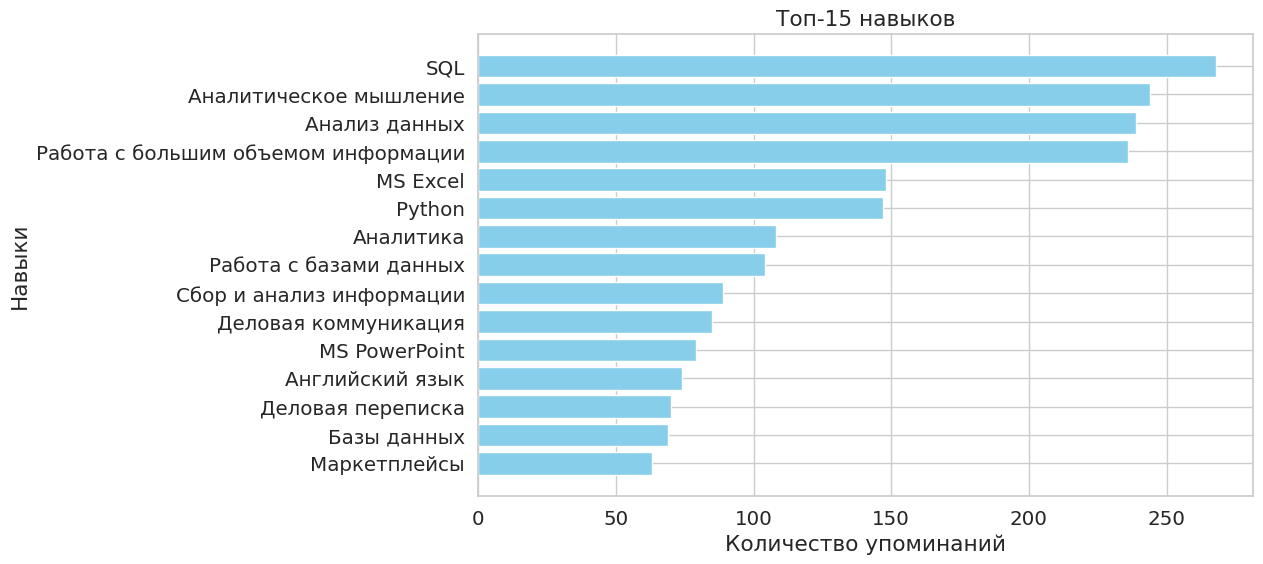

In [ ]:
import matplotlib.pyplot as plt

# Извлекаем названия навыков и их количество упоминаний из top_skills
skills = [skill for skill, count in top_skills]
counts = [count for skill, count in top_skills]

# Строим гистограмму
plt.figure(figsize=(10, 6))
plt.barh(skills, counts, color='skyblue')
plt.xlabel('Количество упоминаний')
plt.ylabel('Навыки')
plt.title('Топ-15 навыков')
plt.gca().invert_yaxis()  # Переворачиваем ось Y для вывода наиболее важных навыков сверху
plt.show()

**Вопрос 3.** Какую зарплату готовы платить работодатели? Соберите некоторым образом статистику и постройте гистограмму.

При работе с данными о заработной плате обратите внимание на валюту и <a target="_blank" href="https://yandex.ru/search/?text=gross%2Fnet&clid=1955455&win=446&lr=213&noreask=1">gross/net</a>. Постоянно подгружать курс валюты не требуется, достаточно фиксировать какой-то один более менее актуальный.

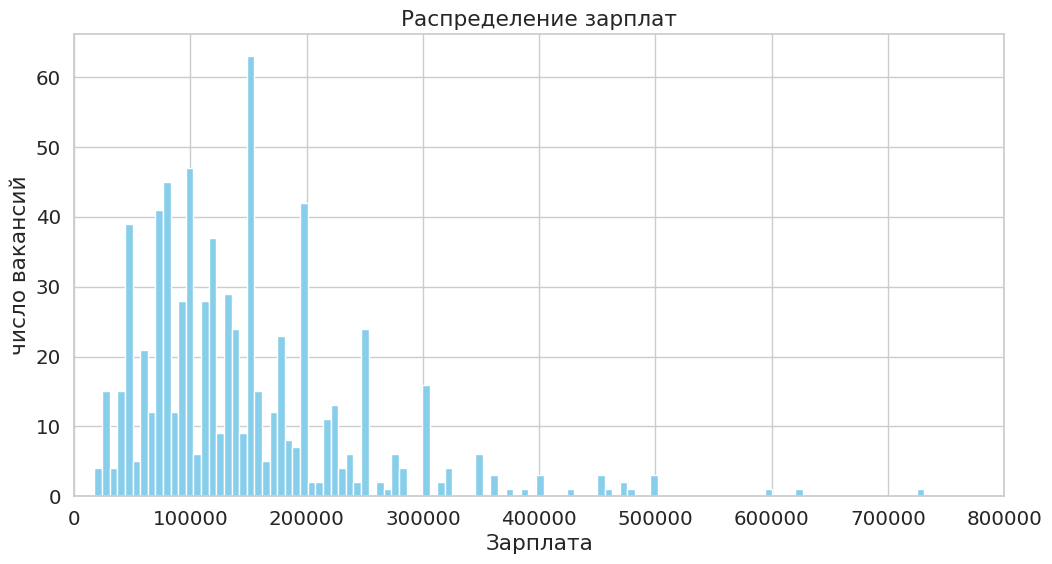

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Определение курса валюты (USD -> RUB)
exchange_rates = {'RUB': 1, 'USD': 91, 'EUR': 99}

# Функция для конвертации зарплаты в рубли
def convert_to_rub(amount, currency):
    return amount * exchange_rates.get(currency, 1)

# Функция для преобразования зарплаты в рубли для каждой строки в DataFrame
def convert(row):
    from_rub = convert_to_rub(row['salary.from'], row['salary.currency']) if pd.notnull(row['salary.from']) else None
    to_rub = convert_to_rub(row['salary.to'], row['salary.currency']) if pd.notnull(row['salary.to']) else None
    if from_rub is None and to_rub is None:
        return None
    else:
        return np.mean([x for x in [from_rub, to_rub] if x is not None])

detailed_data['mean_salary_rub'] = detailed_data.apply(convert, axis=1)
detailed_data.dropna(subset=['mean_salary_rub'], inplace=True)

plt.figure(figsize=(12, 6))
plt.hist(detailed_data['mean_salary_rub'], bins=150, color='skyblue')
plt.title('Распределение зарплат')
plt.xlabel('Зарплата')
plt.ylabel('число вакансий')
plt.grid(True)
plt.xlim(0, 800000)
plt.show()

In [394]:
mean_salary = detailed_data['mean_salary_rub'].mean()
print("Средняя зарплата: {:.2f} рублей".format(mean_salary))

Средняя зарплата: 145538.58 рублей


**Вопрос 4.** Какой формат работы предлагается (в офисе / удаленно / ...)?

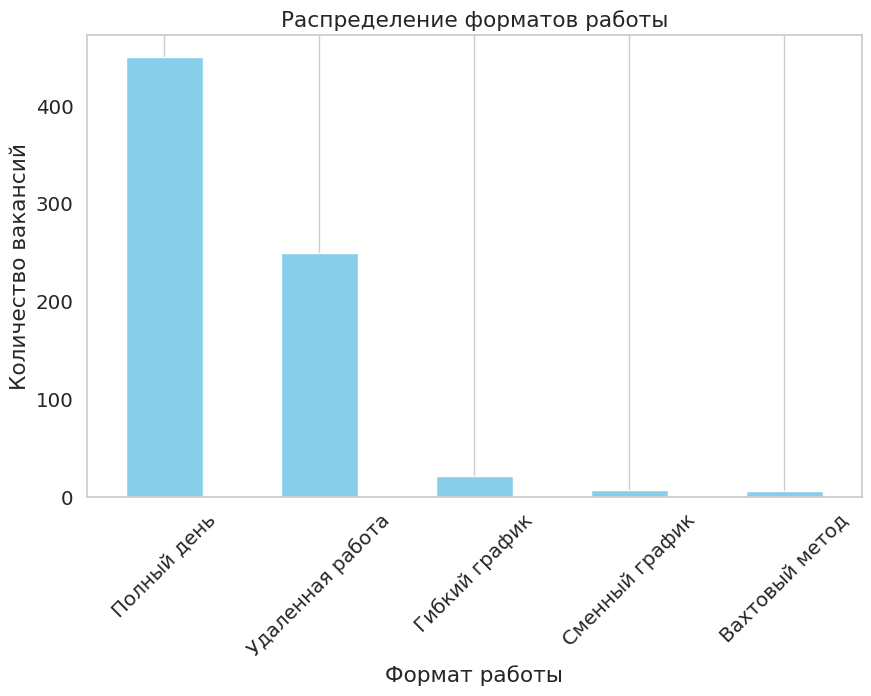

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Загружаем данные о вакансиях в DataFrame с именем detailed_data

# Создаем сводную таблицу, считая количество вакансий для каждого формата работы
work_formats_counts = detailed_data['schedule.name'].value_counts()

# Строим график
plt.figure(figsize=(10, 6))
work_formats_counts.plot(kind='bar', color='skyblue')
plt.title('Распределение форматов работы')
plt.xlabel('Формат работы')
plt.ylabel('Количество вакансий')
plt.xticks(rotation=45)  # Поворачиваем подписи на оси X для лучшей читаемости
plt.grid(axis='y')  # Включаем сетку только по оси Y
plt.show()


In [ ]:
# Предположим, что название столбца с форматом работы - 'schedule.name', а столбцы с названием и описанием работ - 'name' и 'description'
# Если это не так, замените 'schedule.name', 'name' и 'description' на правильные имена столбцов
vakht_jobs = detailed_data[detailed_data['schedule.name'] == 'Вахтовый метод'][['name', 'description']]

# Выводим название и описание работ с форматом "вахтовый метод"
for index, row in vakht_jobs.iterrows():
    print("Название работы:", row['name'])
    print("Описание работы:", row['description'])
    print()


Название работы: Слесарь-сборщик на производство
Описание работы: <p>Производственная компания &quot;Окна Столицы&quot; один из крупнейших производителей светопрозрачных конструкций из алюминия и ПВХ.<br />Широкие производственные возможности, эффективные технологии, инновационные введения!<br />Сотрудники компании - это сплоченная команда специалистов высокой квалификации, нацеленных на решение вопросов и задач совместно.</p> <p>В связи с увеличением объема работ и роста Компании в ООО &quot;ПК &quot;Окна Столицы&quot; требуется Слесарь-сборщик на производство,</p> <p><strong>Оформление официальное </strong>в штат компании, необходимы документы : паспорт, для военнообязанных военный билет, реквизиты банковской карты, трудовая книжка, либо по договору ГПХ.<br /><br /><strong>Медицинскую комиссию</strong> -не нужна</p> <p><strong>График</strong> работы 5/2 или 6/1 по производственной необходимости, неделя в день, неделя в ночь.<br />с 8:00 до 20:00 и с 20:00 до 8:00.</p> <p><strong>Прож

Проведите аналогичный анализ для наиболее привлекательной для вас профессии в любом регионе. Если это Data Scientist, то для анализа выберите другую. В данном пункте спокойно можно сделать копипасту кода.

In [148]:
import time
import requests
import json

URL = "https://api.hh.ru/vacancies"
vacancies2 = []
# req = requests.get(URL, params)
# data = req.json()

# Теперь можем получить количество страниц в результате
# total_pages = data['pages']
def Getter(query_text):
  # req = requests.get(URL, params)
  # data = req.json()
  # req = requests.get(URL, params)

  for page in range(10):  # Цикл по количеству страниц (максимум 10)
    params = {
        "text": query_text,
        "area": 1,
        "page": page,
        "per_page": 100
    }
    req = requests.get(URL, params)
    data = json.loads(req.content.decode())
    vacancies2.extend(data['items'])
    if page >= data['pages'] - 1:  # Проверяем, есть ли еще страницы
        break
    time.sleep(0.05)  # Пауза между запросами

Getter("BrawlStars OR Brawl Stars OR Brawl OR Dota2 OR Dota OR CounetStrike OR CS2 OR Геймер")
Getter("World Of Warcraft OR Witcher OR Ведьмак OR Games OR Cyber sport OR Cybersport")

In [149]:
data2 = pd.json_normalize(vacancies2)
print(data2.shape)
data2.head()
# print(data.shape)

(512, 79)


id  premium                                               name  \
0  98803950    False                Manual QA Engineer / Тестировщик ПО   
1  87790825    False  Геймер / Игрок / Исполнитель заказов в онлайн ...   
2  98184085    False               Chief Financial Officer/CFO (Serbia)   
3  96610257    False              Менеджер киберспортивных спецпроектов   
4  98206634    False                         Руководитель отдела продаж   

   department  has_test  response_letter_required  salary  address  \
0         NaN     False                     False     NaN      NaN   
1         NaN     False                     False     NaN      NaN   
2         NaN     False                     False     NaN      NaN   
3         NaN     False                     False     NaN      NaN   
4         NaN     False                     False     NaN      NaN   

  response_url sort_point_distance              published_at  \
0         None                None  2024-05-19T14:11:52+0300   
1         None                None  2024-05-13T09:41:30+0300   
2         None                None  2024-05-01T17:03:38+0300   
3         None                None  2024-05-17T09:30:57+0300   
4         None                None  2024-05-02T09:13:52+0300   

                 created_at  archived  \
0  2024-05-19T14:11:52+0300     False   
1  2024-05-13T09:41:30+0300     False   
2  2024-05-01T17:03:38+0300     False   
3  2024-05-17T09:30:57+0300     False   
4  2024-05-02T09:13:52+0300     False   

                                 apply_alternate_url  insider_interview  \
0  https://hh.ru/applicant/vacancy_response?vacan...                NaN   
1  https://hh.ru/applicant/vacancy_response?vacan...                NaN   
2  https://hh.ru/applicant/vacancy_response?vacan...                NaN   
3  https://hh.ru/applicant/vacancy_response?vacan...                NaN   
4  https://hh.ru/applicant/vacancy_response?vacan...                NaN   

                                               url  \
0  https://api.hh.ru/vacancies/98803950?host=hh.ru   
1  https://api.hh.ru/vacancies/87790825?host=hh.ru   
2  https://api.hh.ru/vacancies/98184085?host=hh.ru   
3  https://api.hh.ru/vacancies/96610257?host=hh.ru   
4  https://api.hh.ru/vacancies/98206634?host=hh.ru   

                    alternate_url relations contacts working_days  \
0  https://hh.ru/vacancy/98803950        []     None           []   
1  https://hh.ru/vacancy/87790825        []     None           []   
2  https://hh.ru/vacancy/98184085        []     None           []   
3  https://hh.ru/vacancy/96610257        []     None           []   
4  https://hh.ru/vacancy/98206634        []     None           []   

  working_time_intervals                                 working_time_modes  \
0                     []                                                 []   
1                     []  [{'id': 'start_after_sixteen', 'name': 'Можно ...   
2                     []                                                 []   
3                     []                                                 []   
4                     []                                                 []   

   accept_temporary                                 professional_roles  \
0             False             [{'id': '124', 'name': 'Тестировщик'}]   
1             False                   [{'id': '40', 'name': 'Другое'}]   
2             False     [{'id': '137', 'name': 'Финансовый менеджер'}]   
3             False  [{'id': '68', 'name': 'Менеджер по маркетингу,...   
4             False  [{'id': '106', 'name': 'Руководитель отдела пр...   

   accept_incomplete_resumes adv_response_url  is_adv_vacancy adv_context  \
0                      False             None           False        None   
1                      False             None           False        None   
2                      False             None           False        None   
3                      False             None           False        None   
4        

In [150]:
# Удаляем дубликаты по столбцу "id"
data2.drop_duplicates(subset="id", inplace=True)

# Выводим размерность DataFrame и первые несколько строк
print(data2.shape)
data2

(505, 79)


id  premium                                               name  \
0    98803950    False                Manual QA Engineer / Тестировщик ПО   
1    87790825    False  Геймер / Игрок / Исполнитель заказов в онлайн ...   
2    98184085    False               Chief Financial Officer/CFO (Serbia)   
3    96610257    False              Менеджер киберспортивных спецпроектов   
4    98206634    False                         Руководитель отдела продаж   
..        ...      ...                                                ...   
507  98243791    False                       Менеджер по разработке обуви   
508  96978799     True               Менеджер привлечения юридических лиц   
509  96554260    False                                Кредитный инспектор   
510  84058643     True  Консультант Тинькофф Банка со знанием узбекско...   
511  92988984     True  Консультант Тинькофф Банк со знанием узбекског...   

     department  has_test  response_letter_required  salary  address  \
0           NaN     False                     False     NaN      NaN   
1           NaN     False                     False     NaN      NaN   
2           NaN     False                     False     NaN      NaN   
3           NaN     False                     False     NaN      NaN   
4           NaN     False                     False     NaN      NaN   
..          ...       ...                       ...     ...      ...   
507         NaN     False                     False     NaN      NaN   
508         NaN     False                     False     NaN      NaN   
509         NaN     False                     False     NaN      NaN   
510         NaN     False                     False     NaN      NaN   
511         NaN     False                     False     NaN      NaN   

    response_url sort_point_distance              published_at  \
0           None                None  2024-05-19T14:11:52+0300   
1           None                None  2024-05-13T09:41:30+0300   
2           None                None  2024-05-01T17:03:38+0300   
3           None                None  2024-05-17T09:30:57+0300   
4           None                None  2024-05-02T09:13:52+0300   
..           ...                 ...                       ...   
507         None                None  2024-05-02T13:52:34+0300   
508         None                None  2024-05-15T11:54:54+0300   
509         None                None  2024-04-24T17:16:01+0300   
510         None                None  2024-05-14T17:57:58+0300   
511         None                None  2024-05-15T16:31:11+0300   

                   created_at  archived  \
0    2024-05-19T14:11:52+0300     False   
1    2024-05-13T09:41:30+0300     False   
2    2024-05-01T17:03:38+0300     False   
3    2024-05-17T09:30:57+0300     False   
4    2024-05-02T09:13:52+0300     False   
..                        ...       ...   
507  2024-05-02T13:52:34+0300     False   
508  2024-05-15T11:54:54+0300     False   
509  2024-04-24T17:16:01+0300     False   
510  2024-05-14T17:57:58+0300     False   
511  2024-05-15T16:31:11+0300     False   

                                   apply_alternate_url  insider_interview  \
0    https://hh.ru/applicant/vacancy_response?vacan...                NaN   
1    https://hh.ru/applicant/vacancy_response?vacan...                NaN   
2    https://hh.ru/applicant/vacancy_response?vacan...                NaN   
3    https://hh.ru/applicant/vacancy_response?vacan...                NaN   
4    https://hh.ru/applicant/vacancy_response?vacan...                NaN   
..                                                 ...                ...   
507  https://hh.ru/applicant/vacancy_response?vacan...                NaN   
508  https://hh.ru/applicant/vacancy_response?vacan...                NaN   
509  https://hh.ru/applicant/vacancy_response?vacan...                NaN   
510  https://hh.ru/applicant/vacancy_response?vacan...                NaN   
511  https://hh.ru/applicant/vacancy_response?vacan...          

In [170]:
# Создаем пустой список для хранения подробной информации о вакансиях
detailed_vacancies2 = []
i = 0
# Проходим по каждой вакансии и получаем подробное описание
for vacancy_id2 in data2['id']:
    print(i)
    i += 1
    vacancy_url2 = f"https://api.hh.ru/vacancies/{vacancy_id2}"
    vacancy_details2 = requests.get(vacancy_url2).json()
    detailed_vacancies2.append(vacancy_details2)
    time.sleep(0.1)


# Создаем DataFrame с подробной информацией о вакансиях
detailed_data2 = pd.json_normalize(detailed_vacancies2)

# Выводим первые несколько строк для проверки
print(detailed_data2.head())
aaaa = detailed_data2


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [171]:
print(aaaa.shape)


(505, 106)


In [152]:
detailed_data2

id premium relations  \
0    98803950   False        []   
1    87790825   False        []   
2    98184085   False        []   
3    96610257   False        []   
4    98206634   False        []   
..        ...     ...       ...   
500  98243791   False        []   
501  96978799    True        []   
502  96554260   False        []   
503  84058643    True        []   
504  92988984    True        []   

                                                  name  insider_interview  \
0                  Manual QA Engineer / Тестировщик ПО                NaN   
1    Геймер / Игрок / Исполнитель заказов в онлайн ...                NaN   
2                 Chief Financial Officer/CFO (Serbia)                NaN   
3                Менеджер киберспортивных спецпроектов                NaN   
4                           Руководитель отдела продаж                NaN   
..                                                 ...                ...   
500                       Менеджер по разработке обуви                NaN   
501               Менеджер привлечения юридических лиц                NaN   
502                                Кредитный инспектор                NaN   
503  Консультант Тинькофф Банка со знанием узбекско...                NaN   
504  Консультант Тинькофф Банк со знанием узбекског...                NaN   

    response_letter_required  salary  address allow_messages  department  \
0                      False     NaN      NaN           True         NaN   
1                      False     NaN      NaN           True         NaN   
2                      False     NaN      NaN           True         NaN   
3                      False     NaN      NaN           True         NaN   
4                      False     NaN      NaN           True         NaN   
..                       ...     ...      ...            ...         ...   
500                    False     NaN      NaN           True         NaN   
501                    False     NaN      NaN           True         NaN   
502                    False     NaN      NaN           True         NaN   
503                    False     NaN      NaN          False         NaN   
504                    False     NaN      NaN          False         NaN   

     contacts                                        description  \
0         NaN  <p>Наш основной продукт - tastydrop.in. Более...   
1         NaN  <p>Всегда хотел извлечь финансовую выгоду из л...   
2         NaN  <p><strong>FISSURE </strong>— международная ко...   
3         NaN  <p>Компания BetBoom создаёт удобные и технолог...   
4         NaN  <p><strong>FLG </strong>- логистическая компан...   
..        ...                                                ...   
500       NaN  <p><strong>Your responsibilities will be:</str...   
501       NaN  <p>Управление продаж бизнесу — подразделение, ...   
502       NaN  <p>Управление проблемных активов — подразделен...   
503       NaN  <p>Команда поддержки Тинькофф консультирует кл...   
504       NaN  <p>Команда поддержки Тинькофф консультирует кл...   

                                   branded_description  \
0                                                 None   
1                                                 None   
2                                                 None   
3                                                 None   
4                                                 None   
..                                                 ...   
500                                               None   
501  \n<style>\n.hht-vacancydescription {\n  paddin...   
502  \n<style>\n.hht-vacancydescription {\n  paddin...   
503  \n<style>\n.hht-vacancydescription {\n  paddin...   
504  \n<style>\n.hht-vacancydescription {\n  paddin...   

     vacancy_constructor_template  \
0                             NaN   
1                             NaN   
2                             NaN   
3                             NaN   
4                             NaN   
..              

In [327]:
detailed_data2.to_excel('vacancies_gamer.xlsx', index=False)

In [154]:
skills_count2 = {}
for skills in detailed_data2['key_skills']:
    if isinstance(skills, list):  # Проверяем, является ли значение списком
        for skill in skills:
            skills_count2[skill['name']] = skills_count2.get(skill['name'], 0) + 1

# Сортировка навыков по количеству упоминаний и выбор топ-15
top_skills2 = sorted(skills_count2.items(), key=lambda x: x[1], reverse=True)[:15]

# Вывод топ-15 навыков
print("Топ-15 навыков:")
for skill, count in top_skills2:
    print(f"{skill}: {count}")


Топ-15 навыков:
Unity: 31
Английский язык: 26
Работа в команде: 23
Adobe Photoshop: 22
Gamedev: 20
Грамотная речь: 20
Python: 19
Git: 17
SQL: 17
Пользователь ПК: 15
Управление командой: 14
Организаторские навыки: 13
Аналитическое мышление: 13
Figma: 12
UX: 12


In [155]:
import matplotlib.pyplot as plt

# Извлекаем названия навыков и их количество упоминаний из top_skills
skills = [skill for skill, count in top_skills2]
counts = [count for skill, count in top_skills2]

# Строим гистограмму
plt.figure(figsize=(10, 6))
plt.barh(skills, counts, color='skyblue')
plt.xlabel('Количество упоминаний')
plt.ylabel('Навыки')
plt.title('Топ-15 навыков')
plt.gca().invert_yaxis()  # Переворачиваем ось Y для вывода наиболее важных навыков сверху
plt.show()

In [326]:
import numpy as np
import matplotlib.pyplot as plt

# Определение курса валюты (USD -> RUB)
exchange_rates = {'RUB': 1, 'USD': 91, 'EUR': 99}

# Функция для конвертации зарплаты в рубли
def convert_to_rub(amount, currency):
    return amount * exchange_rates.get(currency, 1)
detailed_data2_changed = detailed_data2
# Функция для преобразования зарплаты в рубли для каждой строки в DataFrame
def convert(row):
    from_rub = convert_to_rub(row['salary.from'], row['salary.currency']) if pd.notnull(row['salary.from']) else None
    to_rub = convert_to_rub(row['salary.to'], row['salary.currency']) if pd.notnull(row['salary.to']) else None
    if from_rub is None and to_rub is None:
        return None
    else:
        return np.mean([x for x in [from_rub, to_rub] if x is not None])

detailed_data2_changed['mean_salary_rub'] = detailed_data2_changed.apply(convert, axis=1)
detailed_data2_changed.dropna(subset=['mean_salary_rub'], inplace=True)

plt.figure(figsize=(12, 6))
plt.hist(detailed_data2_changed['mean_salary_rub'], bins=20, color='skyblue')
plt.title('Распределение зарплат')
plt.xlabel('Зарплата геймера')
plt.ylabel('число вакансий')
plt.grid(True)
plt.xlim(0, 800000)
plt.show()

In [395]:
mean_salary = detailed_data2['mean_salary_rub'].mean()
print("Средняя зарплата: {:.2f} рублей".format(mean_salary))


Средняя зарплата: 108893.23 рублей


In [157]:
import matplotlib.pyplot as plt
import pandas as pd

# Загружаем данные о вакансиях в DataFrame с именем detailed_data

# Создаем сводную таблицу, считая количество вакансий для каждого формата работы
work_formats_counts2 = detailed_data2['schedule.name'].value_counts()

# Строим график
plt.figure(figsize=(10, 6))
work_formats_counts2.plot(kind='bar', color='skyblue')
plt.title('Распределение форматов работы')
plt.xlabel('Формат работы')
plt.ylabel('Количество вакансий')
plt.xticks(rotation=45)  # Поворачиваем подписи на оси X для лучшей читаемости
plt.grid(axis='y')  # Включаем сетку только по оси Y
plt.show()


Не забывайте про выводы.
В первой части я ислледовал анализатора данных.Было найдено, что средняя зарплата в этой сфере - 145538.58, самый часто требуемый навык - знание SQL и самый часто встречающийся тип рабочего дня - полный день

Во второй части я решил проанализировать, что же будет меня ждать если я не буду учить анализ данных, а буду играть в компьютерные игры и развиваться в этой сфере. Итак, поиск по названиям самых популярных мобильных, компьютерных игр и словам "киберспорт" и т.д. От нас в основном хотят умение пользоваться Unity (видимо, программирование учить надо). Средняя зарплата здесь 108893.23 (проанализировав это, поймем что зарплата меньше чем у анализатора данных). Графики распределения форматов работы очень схожи с графиками из первой части



---

### <font color="green"><i>Факультативная часть</i></font>

---

### Задача 2.   

Для *одной* из рассмотренных ранее профессий исследуйте, в каком районе Москвы данная вакансия пользуется наибольшим и наименьшим спросом.
Не забудьте про визуализацию, в частности, постройте распределений вакансий на карте.

*Напоминание.* Работа в некоторой степени творческая, поэтому конкретные детали решения в основном остаются на усмотрение автора решения.


In [158]:
detailed_data2['address']

1     NaN
4     NaN
5     NaN
6     NaN
7     NaN
       ..
499   NaN
501   NaN
502   NaN
503   NaN
504   NaN
Name: address, Length: 185, dtype: float64

In [159]:
pd.set_option('display.max_columns', None)
detailed_data2_changed = detailed_data2
detailed_data2_changed = detailed_data2_changed.dropna(axis=1, how='all')
detailed_data2_changed

id premium relations  \
1    87790825   False        []   
4    98206634   False        []   
5    98206498   False        []   
6    94967508   False        []   
7    98545055   False        []   
..        ...     ...       ...   
499  90997724    True        []   
501  96978799    True        []   
502  96554260   False        []   
503  84058643    True        []   
504  92988984    True        []   

                                                  name  \
1    Геймер / Игрок / Исполнитель заказов в онлайн ...   
4                           Руководитель отдела продаж   
5                          Руководитель склада в Китае   
6    Менеджер по продажам (текстовое общение, World...   
7                                 Журналист-копирайтер   
..                                                 ...   
499      Кредитный менеджер по развитию малого бизнеса   
501               Менеджер привлечения юридических лиц   
502                                Кредитный инспектор   
503  Консультант Тинькофф Банка со знанием узбекско...   
504  Консультант Тинькофф Банк со знанием узбекског...   

    response_letter_required allow_messages  \
1                      False           True   
4                      False           True   
5                      False           True   
6                      False           True   
7                      False           True   
..                       ...            ...   
499                    False           True   
501                    False           True   
502                    False           True   
503                    False          False   
504                    False          False   

                                           description  \
1    <p>Всегда хотел извлечь финансовую выгоду из л...   
4    <p><strong>FLG </strong>- логистическая компан...   
5    <p><strong>FLG </strong>- логистическая компан...   
6    <p><strong>Компания WowVendor</strong> — один ...   
7    <p>В киберспортивный проект ищем журналиста, а...   
..                                                 ...   
499  <p>Обслуживание бизнеса — отдел, который помог...   
501  <p>Управление продаж бизнесу — подразделение, ...   
502  <p>Управление проблемных активов — подразделен...   
503  <p>Команда поддержки Тинькофф консультирует кл...   
504  <p>Команда поддержки Тинькофф консультирует кл...   

                                   branded_description  \
1                                                 None   
4                                                 None   
5                                                 None   
6                                                 None   
7                                                 None   
..                                                 ...   
499  \n<style>\n.hht-vacancydescription {\n  paddin...   
501  \n<style>\n.hht-vacancydescription {\n  paddin...   
502  \n<style>\n.hht-vacancydescription {\n  paddin...   
503  \n<style>\n.hht-vacancydescription {\n  paddin...   
504  \n<style>\n.hht-vacancydescription {\n  paddin...   

                                            key_skills accept_handicapped  \
1    [{'name': 'World of Warcraft'}, {'name': 'Гейм...              False   
4    [{'name': 'Управление продажами'}, {'name': 'B...              False   
5    [{'name': 'Ответственное хранение'}, {'name': ...              False   
6    [{'name': 'Английский язык'}, {'name': 'World ...               True   
7    [{'name': 'Копирайтинг'}, {'name': 'Написание ...              False   
..                                                 ...                ...   
499                                                 []              False   
501                                                 []              False   
502                                                 []              False   
503                                                 []              False   
504                                                 []              False   

    accep

In [160]:
vacancies_in_moscow = detailed_data2['area.name'].value_counts().get('Москва')
print("Число вакансий в Москве:", vacancies_in_moscow)


Число вакансий в Москве: 185


In [161]:
non_empty_stations = detailed_data2['address.metro.station_name'].count()
print("Число вакансий, где поле address.metro.station_name непусто:", non_empty_stations)

Число вакансий, где поле address.metro.station_name непусто: 45


In [162]:
vacancies_by_station = detailed_data2['address.metro.station_name'].value_counts()
print(vacancies_by_station)


address.metro.station_name
Дмитровская             15
Динамо                   7
Баррикадная              2
Мичуринский проспект     2
Водный стадион           2
Автозаводская            1
Пражская                 1
Воробьевы горы           1
Крымская                 1
Семеновская              1
Ленинский проспект       1
Окская                   1
Багратионовская          1
Измайловская             1
Аминьевская              1
Текстильщики             1
Белорусская              1
Алексеевская             1
Каховская                1
Савёловская              1
Курская                  1
ВДНХ                     1
Name: count, dtype: int64


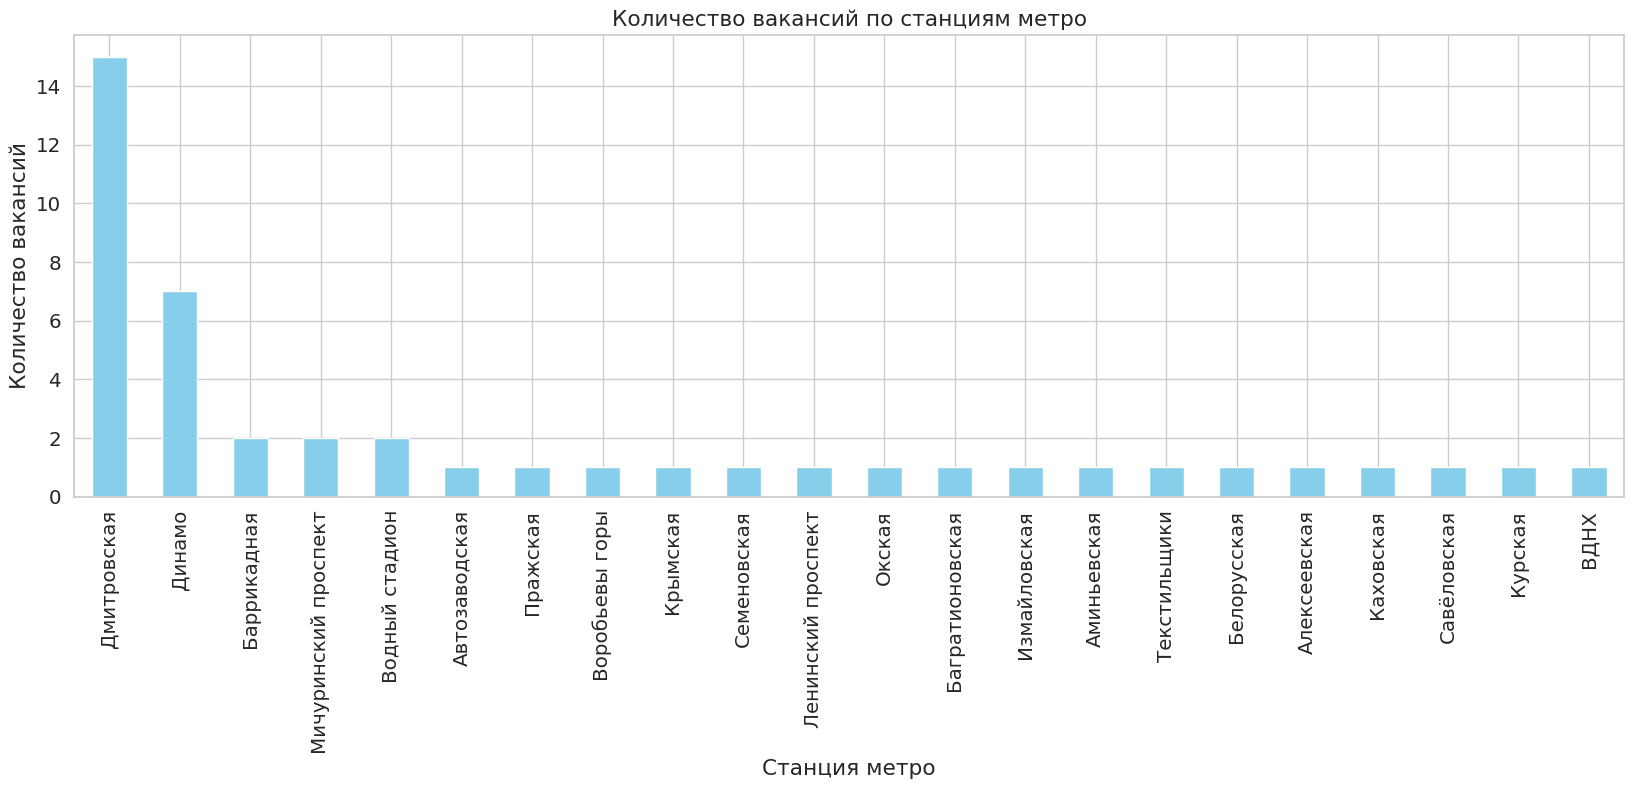

In [163]:
plt.figure(figsize=(20, 6))
vacancies_by_station.plot(kind='bar', color='skyblue')
plt.title('Количество вакансий по станциям метро')
plt.xlabel('Станция метро')
plt.ylabel('Количество вакансий')
plt.show()


по графику видно, что на Дмитровской находится 15 вакантных мест, на Динамо 7, на Баррикадной, Мичуринском проспекте и Водном стадионе по 2, на остальных 1 и меньше. Далее визуализируем это:

In [389]:
metro_coordinates = {
    "Аэропорт": (55.79981, 37.53412),
    "Академическая": (55.68808, 37.57501),
    "Алексеевская": (55.80737, 37.63844),
    "Александровский сад": (55.75219, 37.60836),
    "Алтуфьево": (55.89504, 37.58605),
    "Аннино (стр.)": (55.581818, 37.594978),
    "Арбатская": (55.75228, 37.60357),
    "Авиамоторная": (55.75208, 37.71677),
    "Автозаводская": (55.70801, 37.65858),
    "Бабушкинская": (55.86814, 37.66292),
    "Багратионовская": (55.74326, 37.49753),
    "Баррикадная": (55.76027, 37.58111),
    "Бауманская": (55.77228, 37.67857),
    "Беговая": (55.77378, 37.54412),
    "Белорусская": (55.77492, 37.58207),
    "Беляево": (55.64371, 37.52762),
    "Бибирево": (55.88294, 37.60523),
    "Библиотека им. Ленина": (55.75211, 37.60988),
    "Битцевский парк": (55.60029, 37.55735),
    "Боровицкая": (55.75034, 37.60857),
    "Ботанический сад": (55.84649, 37.63914),
    "Братеево (стр.)": (55.631363, 37.75174),
    "Братиславская": (55.66126, 37.7509),
    "Чеховская": (55.76596, 37.6075),
    "Черкизовская": (55.802, 37.74438),
    "Чертаново": (55.63978, 37.60893),
    "Чистые пруды": (55.76426, 37.6389),
    "Чкаловская": (55.756218, 37.659375),
    "Динамо": (55.78867, 37.55936),
    "Бульвар Дмитрия Донского (стр.)": (55.567759, 37.575724),
    "Дмитровская": (55.80756, 37.57959),
    "Добрынинская": (55.72886, 37.62356),
    "Домодедовская": (55.61009, 37.71612),
    "Достоевская (стр.)": (55.782438, 37.612747),
    "Дубровка": (55.719732, 37.676915),
    "Электрозаводская": (55.78177, 37.70471),
    "Шоссе энтузиастов": (55.75837, 37.75155),
    "Филевский парк": (55.73953, 37.48366),
    "Фили": (55.74673, 37.51384),
    "Фрунзенская": (55.72718, 37.58036),
    "Измайловская": (55.78768, 37.78329),
    "Улица Академика Янгеля (стр.)": (55.596141, 37.59981),
    "Каховская": (55.65332, 37.59722),
    "Калужская": (55.65566, 37.53923),
    "Кантемировская": (55.6343, 37.65632),
    "Каширская": (55.65412, 37.64738),
    "Киевская": (55.74388, 37.56673),
    "Китай город": (55.75634, 37.63002),
    "Китай город": (55.753903, 37.635405),
    "Коломенское": (55.67745, 37.66298),
    "Комсомольская": (55.77717, 37.655689),
    "Коньково": (55.63253, 37.52005),
    "Кожуховская": (55.70533, 37.68508),
    "Красногвардейская": (55.614491, 37.744724),
    "Краснопресненская": (55.760109, 37.577141),
    "Красносельская": (55.780763, 37.666264),
    "Красные ворота": (55.76958, 37.6499),
    "Крестьянская застава": (55.732877, 37.668998),
    "Кропоткинская": (55.74525, 37.60463),
    "Крылатское": (55.75879, 37.40633),
    "Кунцевская": (55.73045, 37.44646),
    "Курская": (55.75848, 37.65985),
    "Кутузовская": (55.73947, 37.53433),
    "Кузьминки": (55.70531, 37.76775),
    "Кузнецкий мост": (55.76118, 37.62386),
    "Ленинский проспект": (55.70818, 37.58742),
    "Лубянка": (55.75876, 37.62573),
    "Люблино": (55.67694, 37.76316),
    "Марьина роща (стр.)": (55.793602, 37.615762),
    "Марьино": (55.65193, 37.74771),
    "Марксистская": (55.7407, 37.65773),
    "Маяковская": (55.76909, 37.59635),
    "Медведково": (55.88594, 37.6612),
    "Менделеевская": (55.78251, 37.59792),
    "Минская (стр.)": (55.731548, 37.491016),
    "Проспект мира": (55.781196, 37.633529),
    "Митино (стр.)": (55.84589, 37.35909),
    "Молодежная": (55.74001, 37.41724),
    "Нагатинская": (55.68386, 37.62285),
    "Нагорная": (55.67283, 37.61019),
    "Нахимовский проспект": (55.66376, 37.60767),
    "Новые черемушки": (55.66892, 37.55417),
    "Новогиреево": (55.75111, 37.81564),
    "Текстильщики": (55.708705, 37.731573),
    "Новокосино (стр.)": (55.740539, 37.856347),
    "Новокузнецкая": (55.74212, 37.62901),
    "Новослободская": (55.77921, 37.6009),
    "Охотный ряд": (55.75703, 37.61614),
    "Октябрьское поле": (55.793615, 37.493496),
    "Октябрьская": (55.729, 37.61139),
    "Орехово": (55.61214, 37.69584),
    "Отрадное": (55.86417, 37.60488),
    "Парк культуры": (55.73512, 37.59328),
    "Парк Победы (стр.)": (55.736559, 37.512591),
    "Партизанская": (55.78962, 37.7479),
    "Павелецкая": (55.7313, 37.63612),
    "Печатники": (55.69252, 37.7295),
    "Перово": (55.75109, 37.78854),
    "Первомайская": (55.79342, 37.79979),
    "Петровско-Разумовская": (55.83712, 37.57349),
    "Пионерская": (55.73583, 37.46731),
    "Планерная": (55.85931, 37.43687),
    "Площадь Ильича": (55.745663, 37.681123),
    "Улица Подбельского": (55.81503, 37.73209),
    "Улица Подбельского": (55.81336, 37.73524),
    "Полежаевская": (55.77691, 37.51692),
    "Полянка": (55.73654, 37.61856),
    "Пражская": (55.61354, 37.60499),
    "Преображенская площадь": (55.79655, 37.71591),
    "Профсоюзная": (55.67822, 37.56381),
    "Пролетарская": (55.73171, 37.66726),
    "Пронская (стр.)": (55.698344, 37.850869),
    "Пушкинская": (55.76565, 37.60417),
    "Речной вокзал": (55.85378, 37.47679),
    "Площадь Революции": (55.75646, 37.62321),
    "Рижская": (55.79222, 37.63557),
    "Римская": (55.746487, 37.682631),
    "Рязанский проспект": (55.71753, 37.79425),
    "Савёловская": (55.79421, 37.58666),
    "Щелковская": (55.80955, 37.79884),
    "Щукинская": (55.80796, 37.46629),
    "Семеновская": (55.783136, 37.719471),
    "Cерпуховская": (55.72658, 37.62462),
    "Cевастопольская": (55.65121, 37.59939),
    "Шаболовская": (55.71886, 37.60797),
    "Cходненская": (55.84937, 37.43951),
    "Cлавянский бульвар (стр.)": (55.729508, 37.468829),
    "Cмоленская": (55.74823, 37.58384),
    "Cокол": (55.80518, 37.51495),
    "Cокольники": (55.78893, 37.67943),
    "Cпортивная": (55.72397, 37.56547),
    "Cретенский бульвар (стр.)": (55.765551, 37.635261),
    "Cтрогино (стр.)": (55.80435, 37.396363),
    "Крымская": (55.689939, 37.604729),
    "Cтуденческая": (55.73873, 37.54825),
    "Cухаревская": (55.77211, 37.63239),
    "Площадь Cуворова (стр.)": (55.781984, 37.614487),
    "Cвиблово": (55.85543, 37.65419),
    "Таганская": (55.74255, 37.65389),
    "Театральная": (55.75857, 37.6177),
    "Текстильшики": (55.70947, 37.73282),
    "Теплый стан": (55.61814, 37.50814),
    "Тимирязевская": (55.81842, 37.57571),
    "Третьяковская": (55.74061, 37.62492),
    "Трубная (стр.)": (55.767605, 37.6221),
    "Царицино": (55.62011, 37.66939),
    "Цветной бульвар": (55.7716, 37.62058),
    "Тульская": (55.70901, 37.6226),
    "Тургеневская": (55.7646, 37.63623),
    "Тушинская": (55.8258, 37.43621),
    "Тверская": (55.7652, 37.60352),
    "Улица 1905 года": (55.76355, 37.56375),
    "Университет": (55.69167, 37.53433),
    "Варшавская": (55.65381, 37.62084),
    "ВДНХ": (55.82177, 37.64107),
    "Проспект Вернадского": (55.67613, 37.5045),
    "Владыкино": (55.84669, 37.59251),
    "Водный стадион": (55.8386, 37.48749),
    "Войковская": (55.81811, 37.49905),
    "Волоколамская (стр.)": (55.83459, 37.38367),
    "Волгоградский проспект": (55.7243, 37.68795),
    "Волжская": (55.69101, 37.75498),
    "Воробьевы горы": (55.710454, 37.558601),
    "Выхино": (55.715, 37.81802),
    "Ясенево": (55.60535, 37.53494),
    "Аминьевская": (55.697230, 37.464808),
    "Юго-западная": (55.66464, 37.48421),
    "Южная": (55.62122, 37.60752),
    "Окская": (55.718294, 37.781539),
    "Мичуринский проспект": (55.693054, 37.490479),
}


Я сделал такую ничего себешную карту с метро, где радиус кружка зависит от числа вакансий возле станции метро

выше в ячейке создается словарь со всеми координатами станций метро Москвы

мне кажется, что эта карта - самое красивое, что я делал за курс анализа данных. пожалуйста, если Вам тоже нравится эта карта, то не снимайте мне много баллов за task10🙏🙏🙏


In [390]:
import folium

# Создание базовой карты Москвы
map = folium.Map(location=[55.7558, 37.6173], zoom_start=10)

# Добавление точек для каждой станции метро с числом вакансий как цветом маркера
for station, count in vacancies_by_station.items():
    color = 'blue'
    size = count
    if count > 5:
        color = 'red'
        size = count+2
    if count == 2:
        color = 'green'
        size = 6
    if count == 1:
        size = 4
    folium.CircleMarker(
        location=[metro_coordinates[station][0], metro_coordinates[station][1]],
        color=color,
        radius=size,  # Размер маркера зависит от числа вакансий
        fill=True,
        fill_color=color,
        fill_opacity=0.7,
        popup=f"{station}: {count} вакансий",
        tooltip=f"{station}: {count} вакансий"  # Подсказка при наведении указателя мыши
    ).add_to(map)

map.save('супер_мега_крутая_карта_с_метро.html')
map


изобразим для начала все существующие вакансии чтобы понимать, где вообще требуются сотрудники из гейм-индустрии

In [391]:
import folium

# Create map centered at Moscow
map = folium.Map(location=[52.58, 36.05], zoom_start=6)


# Add markers for each vacancy point
for index, row in detailed_data2.iterrows():
    if not pd.isnull(row['address.lat']) and not pd.isnull(row['address.lng']):
        folium.Marker(
            location=[row['address.lat'], row['address.lng']],
            popup=row['name']
        ).add_to(map)

map.save('map_of_the_world.html')
# Display the map
map

а теперь локализируем график для Москвы:

In [392]:
import folium

# Create map centered at Moscow
map = folium.Map(location=[55.7558, 37.6173], zoom_start=10)

# Add markers for each vacancy point
for index, row in detailed_data2.iterrows():
    if not pd.isnull(row['address.lat']) and not pd.isnull(row['address.lng']):
        folium.Marker(
            location=[row['address.lat'], row['address.lng']],
            popup=row['name']
        ).add_to(map)

map.save('map_of_Moscow.html')
# Display the map
map

Какие выводы можно сделать из построенных графиков?

Что вполне ожидаемо, скопление вакансий в Москве приходится как раз-таки в самом центре.

Как было найдено выше, самая популярная станция метро - Дмитровская. Видимо, там базируется почти вся гейм-индустрия Москвы.

Также на втором графике видно, что есть две вакансии за пределами Москвы: в Киеве и Тамбове. Заметим, что они удовлетворяют нашим требованиям (в Киеве ищут специалисту по Варкрафту)

---

### Задача 3.   

**1.** Проверьте, во скольких вакансиях среди выгруженных указана зарплата?


In [172]:
# Подсчет количества вакансий с указанной зарплатой
vacancies_with_salary = detailed_data2['salary.from'].notnull().sum()

print("Число вакансий с указанной минимальной зарплатой:", vacancies_with_salary)
print(detailed_data2.shape[0])
print(aaaa.shape)

detailed_data2

Число вакансий с указанной минимальной зарплатой: 171
505
(505, 106)


id premium relations  \
0    98803950   False        []   
1    87790825   False        []   
2    98184085   False        []   
3    96610257   False        []   
4    98206634   False        []   
..        ...     ...       ...   
500  98243791   False        []   
501  96978799    True        []   
502  96554260   False        []   
503  84058643    True        []   
504  92988984    True        []   

                                                  name  insider_interview  \
0                  Manual QA Engineer / Тестировщик ПО                NaN   
1    Геймер / Игрок / Исполнитель заказов в онлайн ...                NaN   
2                 Chief Financial Officer/CFO (Serbia)                NaN   
3                Менеджер киберспортивных спецпроектов                NaN   
4                           Руководитель отдела продаж                NaN   
..                                                 ...                ...   
500                       Менеджер по разработке обуви                NaN   
501               Менеджер привлечения юридических лиц                NaN   
502                                Кредитный инспектор                NaN   
503  Консультант Тинькофф Банка со знанием узбекско...                NaN   
504  Консультант Тинькофф Банк со знанием узбекског...                NaN   

    response_letter_required  salary  address allow_messages  department  \
0                      False     NaN      NaN           True         NaN   
1                      False     NaN      NaN           True         NaN   
2                      False     NaN      NaN           True         NaN   
3                      False     NaN      NaN           True         NaN   
4                      False     NaN      NaN           True         NaN   
..                       ...     ...      ...            ...         ...   
500                    False     NaN      NaN           True         NaN   
501                    False     NaN      NaN           True         NaN   
502                    False     NaN      NaN           True         NaN   
503                    False     NaN      NaN          False         NaN   
504                    False     NaN      NaN          False         NaN   

     contacts                                        description  \
0         NaN  <p>Наш основной продукт - tastydrop.in. Более...   
1         NaN  <p>Всегда хотел извлечь финансовую выгоду из л...   
2         NaN  <p><strong>FISSURE </strong>— международная ко...   
3         NaN  <p>Компания BetBoom создаёт удобные и технолог...   
4         NaN  <p><strong>FLG </strong>- логистическая компан...   
..        ...                                                ...   
500       NaN  <p><strong>Your responsibilities will be:</str...   
501       NaN  <p>Управление продаж бизнесу — подразделение, ...   
502       NaN  <p>Управление проблемных активов — подразделен...   
503       NaN  <p>Команда поддержки Тинькофф консультирует кл...   
504       NaN  <p>Команда поддержки Тинькофф консультирует кл...   

                                   branded_description  \
0                                                 None   
1                                                 None   
2                                                 None   
3                                                 None   
4                                                 None   
..                                                 ...   
500                                               None   
501  \n<style>\n.hht-vacancydescription {\n  paddin...   
502  \n<style>\n.hht-vacancydescription {\n  paddin...   
503  \n<style>\n.hht-vacancydescription {\n  paddin...   
504  \n<style>\n.hht-vacancydescription {\n  paddin...   

     vacancy_constructor_template  \
0                             NaN   
1                             NaN   
2                             NaN   
3                             NaN   
4                             NaN   
..              

На основе описания вакансий с известной зарплатой попробуйте оценить ожидаемую зарплату для всех остальных вакансий. Для этого на основе текстового описания вакансии можно построить эмбеддинги (любые подходящие нейросетевые или просто one-hot кодирование). По этим эмбеддингам обучите некоторую модель предсказывать зарплату.

Не забудьте по общий пайплайн ML-моделей, а также про применимость различных методов.

In [218]:
dataset = aaaa[['description', 'salary.from']]
dataset.head()

description  salary.from
0  <p>Наш основной продукт - tastydrop.in. Более...          NaN
1  <p>Всегда хотел извлечь финансовую выгоду из л...      30000.0
2  <p><strong>FISSURE </strong>— международная ко...          NaN
3  <p>Компания BetBoom создаёт удобные и технолог...          NaN
4  <p><strong>FLG </strong>- логистическая компан...     200000.0

Далее я применю нейросеть из task6, просто скопировав все строки из нее. Если читателю интересно, он может открыть мой ноутбук по шестому заданию, где есть все комментарии по данной нейросети, или написать мне в личные сообщения обсудить

In [245]:
dataset_with_salaries = dataset.loc[(dataset['salary.from'].notnull()) & (dataset['salary.from'] != 'unknown')]
dataset_without_salaries = dataset.loc[(dataset['salary.from'].isnull()) | (dataset['salary.from'] == 'unknown')]
print(dataset_with_salaries.head())
print(dataset_without_salaries.head())


                                         description  salary.from
1  <p>Всегда хотел извлечь финансовую выгоду из л...      30000.0
4  <p><strong>FLG </strong>- логистическая компан...     200000.0
5  <p><strong>FLG </strong>- логистическая компан...     170000.0
6  <p><strong>Компания WowVendor</strong> — один ...      70000.0
7  <p>В киберспортивный проект ищем журналиста, а...      30000.0
                                          description  salary.from
0   <p>Наш основной продукт - tastydrop.in. Более...          NaN
2   <p><strong>FISSURE </strong>— международная ко...          NaN
3   <p>Компания BetBoom создаёт удобные и технолог...          NaN
11  <p><strong>ЛАНИТ</strong> - многопрофильная гр...          NaN
12  <p><strong>Привет! Мы - </strong><strong>9Pand...          NaN


In [290]:
dataset_with_salaries.rename(columns={'description': 'FullDescription'}, inplace=True)
dataset_with_salaries.rename(columns={'salary.from': 'SalaryNormalized'}, inplace=True)
dataset_without_salaries.rename(columns={'description': 'FullDescription'}, inplace=True)
dataset_without_salaries.rename(columns={'salary.from': 'SalaryNormalized'}, inplace=True)
dataset_without_salaries['SalaryNormalized'] = 1
dataset_without_salaries = dataset_without_salaries.reset_index(drop=True)
dataset_with_salaries = dataset_with_salaries.reset_index(drop=True)
print(dataset_with_salaries.head())
print(dataset_without_salaries.head())

                                     FullDescription  SalaryNormalized
0  <p>Всегда хотел извлечь финансовую выгоду из л...           30000.0
1  <p><strong>FLG </strong>- логистическая компан...          200000.0
2  <p><strong>FLG </strong>- логистическая компан...          170000.0
3  <p><strong>Компания WowVendor</strong> — один ...           70000.0
4  <p>В киберспортивный проект ищем журналиста, а...           30000.0
                                     FullDescription  SalaryNormalized
0  <p>Наш основной продукт - tastydrop.in. Более...                 1
1  <p><strong>FISSURE </strong>— международная ко...                 1
2  <p>Компания BetBoom создаёт удобные и технолог...                 1
3  <p><strong>ЛАНИТ</strong> - многопрофильная гр...                 1
4  <p><strong>Привет! Мы - </strong><strong>9Pand...                 1


In [291]:
dataset_with_salaries.iloc[0]["FullDescription"]

'<p>Всегда хотел извлечь финансовую выгоду из любимого хобби, но не знал, с чего начать? Мы предлагаем тебе превратить игру в World of Warcraft в твою новую карьеру, и все это с нашей помощью.<br /><br /><strong>Чем придется заниматься?</strong><br />Мы выдадим вам аккаунт компании, обучим вас, чтобы вы играли с другими игроками, обучали их. Ежедневно тысячи игроков нуждаются в помощи с прохождением рейдов, получением рейтингов, трудных достижений и престижных наград. Если ты опытный геймер и готов помогать другим игрокам, мы ждем тебя в нашей команде!<br /><br /><strong>Кто мы такие?</strong><br />Мы - WowVendor, один из крупнейших сервисов, оказывающих услуги в онлайн играх с 2014 года. Нашу работу ценят тысячи довольных клиентов - это подтверждают более 28 000 отзывов с рейтингом &quot;Отлично&quot; — 4.9/5 на платформе TrustPilot.<br /><br />Сейчас мы открываем новое направление - Школу, где мы будем бесплатно обучать тех, кто готов прокачать свои игровые навыки до нового уровня и 

In [292]:
import time
import numpy as np
import pandas as pd
from tqdm import tqdm
from string import punctuation
import matplotlib.pyplot as plt
from collections import Counter, OrderedDict
from IPython.display import clear_output

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
from torch.nn.utils.rnn import pad_sequence

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import torchtext
from torchtext.data.utils import get_tokenizer

import seaborn as sns

sns.set(palette="Set2")
sns.set_style("whitegrid")

import nltk

nltk.download("stopwords")

device = (
    "mps"
    if torch.backends.mps.is_available()
    else "cuda" if torch.cuda.is_available() else "cpu"
)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [293]:
# Зададим токенизаторы
tokenizer = get_tokenizer("spacy", language="en_core_web_sm")
stop_words = nltk.corpus.stopwords.words("english")  # стоп-слова
punc = list(punctuation)  # пунктуация

In [294]:
# Задаем счетчики
counter = Counter()

# Подсчитываем количество вхождений каждого токена
for text in dataset_with_salaries['FullDescription']:
    # Проверяем тип данных
    if isinstance(text, str):
        counter.update(
            token
            for token in tokenizer(text)
            if token not in stop_words and token not in punc
        )

for text in dataset_without_salaries['FullDescription']:
    # Проверяем тип данных
    if isinstance(text, str):
        counter.update(
            token
            for token in tokenizer(text)
            if token not in stop_words and token not in punc
        )

ordered_dict = OrderedDict(counter)
MAX_VOCAB_SIZE = 25000  # Ограничение на словарь
ordered_dict = OrderedDict(counter.most_common(MAX_VOCAB_SIZE))


In [295]:
# зададим словарь
vocab = torchtext.vocab.vocab(ordered_dict)

unk_token = "<unk>"
pad_token = "<pad>"


def add_special_tokens(vocab):
    """Функция для добавления специальных токенов в словарь."""
    for special_token in [unk_token, pad_token]:
        vocab.append_token(special_token)
    vocab.set_default_index(vocab[unk_token])
    UNK_IDX = vocab[unk_token]
    PAD_IDX = vocab[pad_token]
    return vocab, UNK_IDX, PAD_IDX


vocab, UNK_IDX_EN, PAD_IDX_EN = add_special_tokens(vocab)
num_tokens = len(vocab)

In [296]:
class SalaryPredictionDataset(Dataset):
    """Класс датасета для предсказания зарплаты"""

    def __init__(self, texts, target):
        """
        Параметры.
        1) texts (list) — корпус токенизированных текстов, на котором будет
                          происходить обучение
        2) target (list) — истинные значения зарплат
        3) pad_idx (int) — индекс для паддинга
        """
        self.texts = texts
        self.target = target

    def __len__(self):
        return len(self.target)

    def __getitem__(self, idx):
        return self.texts[idx], self.target[idx]


In [297]:
def pad_collate(batch):
    """
    Формирует тензоры из токенизированных текстов и меток, а также
    дополняет последовательности токенов до максимальной длины в батче с UNK_IDX
    """
    texts, target = zip(*batch)

    texts_tensors = [torch.LongTensor(t) for t in texts]
    target = torch.FloatTensor(target)

    texts_tensors = pad_sequence(
        texts_tensors, padding_value=PAD_IDX_EN, batch_first=True
    )

    return texts_tensors, target

In [298]:
tokens = [vocab(tokenizer(text)) for text in dataset_with_salaries["FullDescription"]]
target = [float(value) for value in dataset_with_salaries["SalaryNormalized"]]

In [310]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Разделение датасета с зарплатами на train и valid
train_data_with_salaries, valid_data_with_salaries = train_test_split(
    dataset_with_salaries, test_size=0.2, random_state=42)

# Создание датасета train_data на основе dataset_with_salaries
train_tokens = train_data_with_salaries['FullDescription']
train_target = train_data_with_salaries['SalaryNormalized']

# Создание датасета valid_data на основе dataset_without_salaries
valid_tokens = dataset_without_salaries['FullDescription']
valid_target = dataset_without_salaries['SalaryNormalized']

# Преобразование целевой переменной train_target
scaler = MinMaxScaler()
train_target_std = scaler.fit_transform(np.array(train_target).reshape(-1, 1))

# Преобразование целевой переменной valid_target с использованием того же MinMaxScaler
valid_target_std = scaler.transform(np.array(valid_target).reshape(-1, 1))

# Создание объектов SalaryPredictionDataset для train и valid
train_data = SalaryPredictionDataset(train_tokens, train_target_std)
valid_data = SalaryPredictionDataset(valid_tokens, valid_target_std)

len(train_data), len(valid_data)


(136, 334)

In [311]:
print("Преобразованные таргеты:")
for t in train_data[:3][1]:
    print(round(t.item(), 4), end=", ")
print("...")

Преобразованные таргеты:
0.3413, 0.3489, 0.1485, ...


In [312]:
BATCH_SIZE = 64  # размер батча

# сформируем даталоадеры
train_loader = DataLoader(
    train_data, batch_size=BATCH_SIZE, shuffle=True, collate_fn=pad_collate
)

valid_loader = DataLoader(
    valid_data, batch_size=BATCH_SIZE, shuffle=False, collate_fn=pad_collate
)

In [313]:
class SimpleRNNRegressor(nn.Module):
    """ Модель для регрессии на основе LSTM"""

    def __init__(
        self,
        num_tokens=num_tokens,
        emb_size=512,
        rnn_num_units=64,
        hidden_size=128,
        output_dim=1
    ):
        """
        1) num_tokens — общее количество токенов,
        2) emb_size — размер эмбеддингового пространства,
        3) rnn_num_units - размер пространства скрытых представлений в rnn,
        4) hidden_size - размер скрытого слоя,
        5) output_dim - размерность выхода-предсказания.
        """
        super(SimpleRNNRegressor, self).__init__()
        self.embedding = nn.Embedding(num_tokens, emb_size)
        self.rnn = nn.LSTM(emb_size, rnn_num_units, batch_first=True)
        self.fc1 = nn.Linear(rnn_num_units, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, output_dim)

    def forward(self, x):
        """
        * x — тензор текстовых данных с размерностью (batch_size, seq_len).

        Возвращает:
        * predictions - предсказания модели с размерностью (batch_size, output_dim).
        """
        embedded = self.embedding(x)
        rnn_output, _ = self.rnn(embedded)
        x = F.relu(self.fc1(rnn_output[:, -1, :]))
        x = F.relu(self.fc2(x))
        predictions = self.fc3(x)
        return predictions


In [314]:
def train(model, iterator, optimizer, criterion, train_loss_history):
    """
    Функция для обучения модели на обучающем датасете и подсчёта
    её ошибки.

    Параметры.
    1) model — модель,
    2) iterator — итератор обучающего датасета,
    3) optimizer — класс метода оптимизации,
    4) criterion — функция потерь.
    """

    epoch_loss = 0
    epoch_acc = 0
    model.train()

    # Проход по всему датасету
    for batch_id, batch in enumerate(iterator):
        # Обучение на 1 батче, подсчет метрики
        optimizer.zero_grad()
        # получим предсказания модели
        texts, labels = batch
        texts, labels = texts.to(device), labels.to(device)
        predictions = model(texts).squeeze(1)
        loss = criterion(predictions, labels)
        acc = mse(predictions, labels)

        # сделаем back-propagation для подсчёта градиентов
        loss.backward()
        # выполним шаг оптимизатора
        optimizer.step()
        # обновим метрики
        epoch_loss += loss.item()
        epoch_acc += acc.item()
        train_loss_history.append(loss.item())

    return epoch_loss / len(iterator), epoch_acc / len(iterator)


def evaluate(model, iterator, criterion, val_loss_history=None):
    """
    Функция для применения модели на валидационном/тестовом датасете и подсчёта
    её точности.

    Параметры.
    1) model — модель,
    2) iterator — итератор датасета,
    3) criterion — функция потерь.
    """

    epoch_loss = 0
    epoch_acc = 0

    model.eval()

    with torch.no_grad(): # отключим подсчёт градиентов на валидации
        # Проход по всему датасету
        for batch_id, batch in enumerate(iterator):
            # Обучение на 1 батче, подсчет метрики
            texts, labels = batch
            texts, labels = texts.to(device), labels.to(device)
            # получим предсказания
            predictions = model(texts).squeeze(1)
            # посчитаем метрики
            loss = criterion(predictions, labels)
            acc = mse(predictions, labels)
            # обновим метрики
            epoch_loss += loss.item()
            epoch_acc += acc.item()
            if val_loss_history is not None:
                val_loss_history.append(loss.item())

    return epoch_loss / len(iterator), epoch_acc / len(iterator)


def epoch_time(start_time, end_time):
    """
    Функция для подсчёта времени работы одной эпохи.

    Параметры.
    1) start_time — время начала запуска,
    2) end_time — время завершения работы эпохи.
    """

    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [315]:
def visualize_epoch(epoch, start_time, loss_history, mse_history):
    """
    Функция для визуализации 1 эпохи.

    Параметры.
    1) epoch — номер эпохи,
    2) start_time — время начала эпохи,
    3) loss_history - tuple истории лосса на train и test,
    4) mse_history - tuple истории MSE на train и test.
    """
    # Посчитаем время работы одной эпохи
    end_time = time.time()
    epoch_mins, epoch_secs = epoch_time(start_time, end_time)

    # Отобразим графики лоссов
    clear_output(True)
    plt.figure(figsize=(18, 6))

    train_loss_history, val_loss_history = loss_history
    plt.subplot(1, 3, 1)
    plt.plot(train_loss_history)
    plt.title("Train Loss")
    plt.xlabel("Номер батча")
    plt.subplot(1, 3, 2)
    plt.plot(val_loss_history, color="tab:orange")
    plt.title("Valid Loss")
    plt.xlabel("Номер батча")

    # Отрисуем значение MSE от эпохи
    train_mse_history, val_mse_history = mse_history
    plt.subplot(1, 3, 3)
    plt.plot(train_mse_history, label="Train")
    plt.plot(val_mse_history, label="Valid")
    plt.legend()
    plt.title("MSE")
    plt.xlabel("Номер эпохи")
    plt.show()

    print(
        f"Номер эпохи: {epoch+1:02} | Время обучения эпохи: {epoch_mins}m {epoch_secs}s"
    )


def training_loop(model_instance, n_epochs=10):
    """
    Функция для обучения нейронной сети.

    Параметры.
    1) model_instance — обучаемая модель,
    2) n_epochs — количество эпох.
    """

    best_valid_loss = float("inf")
    train_loss_history = []
    val_loss_history = []
    train_mse_history = []
    val_mse_history = []

    for epoch in range(n_epochs):
        start_time = time.time()
        # Обучим одну эпоху на обучающем датасете
        train_loss, train_mse = train(
            model_instance,
            train_loader,
            optimizer,
            criterion,
            train_loss_history,
        )
        train_mse_history.append(train_mse)

        # Оценим ошибку модели на тестовом датасете
        valid_loss, valid_mse = evaluate(
            model_instance, valid_loader, criterion, val_loss_history
        )
        val_mse_history.append(valid_mse)

        # Если значение функции потерь улучшилось, сохраним параметры модели
        if valid_loss < best_valid_loss:
            best_valid_loss = valid_loss
            torch.save(model_instance.state_dict(), "model_checkpoint.pt")

        # Визуализируем результаты эпохи
        visualize_epoch(
            epoch,
            start_time,
            (train_loss_history, val_loss_history),
            (train_mse_history, val_mse_history),
        )

In [316]:
train_tokens

100    <p>Ищем опытного специалиста развития качества...
75     <p><strong>Payment:</strong> 140,000 - 200,000...
42     <p><strong>Компания F5GAME </strong>на рынке б...
2      <p><strong>FLG </strong>- логистическая компан...
95     <p>Мастер по ремонту игровых приставок</p> <p>...
                             ...                        
71     <p><strong>Silverfox Games </strong>-<strong> ...
106    <p>Делопроизводитель с перспективой перехода в...
14     <p><strong>TIMELESS</strong> - это сеть премиа...
92     <div> <p>Департамент клиентского обслуживания ...
102    <p>Мы ищем Lead гейм-дизайнера с опытом работы...
Name: FullDescription, Length: 136, dtype: object

In [317]:
def mse(preds, y):
    """
    Возвращает среднеквадратичную ошибку модели.

    Параметры.
    1) preds — предсказания модели,
    2) y — истинные значения таргета.
    """

    return F.mse_loss(preds, y, reduction="mean")

In [325]:
# Обучение нейросети на train_data_with_salaries
model = SimpleRNNRegressor().to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
training_loop(model_1)

# Предсказание зарплат для dataset_without_salaries
predicted_salaries = []

# Преобразование текстов в токены
tokens = [vocab(tokenizer(text)) for text in dataset_without_salaries["FullDescription"]]

# Создание DataLoader
predict_loader = DataLoader(
    tokens, batch_size=BATCH_SIZE, shuffle=False, collate_fn=pad_collate
)

# Перевод данных на устройство
model.eval()
model.to(device)

# Предсказание зарплат
with torch.no_grad():
    for batch in predict_loader:
        texts_tensors = batch.to(device)
        predictions = model(texts_tensors).squeeze(1)
        predicted_salaries.extend(predictions.cpu().numpy())

# Запись предсказанных зарплат обратно в dataset_without_salaries
dataset_without_salaries['SalaryNormalized'] = predicted_salaries


FullDescription  SalaryNormalized
0    <p>Наш основной продукт - tastydrop.in. Более...             78456
1    <p><strong>FISSURE </strong>— международная ко...             76466
2    <p>Компания BetBoom создаёт удобные и технолог...             66644
3    <p><strong>ЛАНИТ</strong> - многопрофильная гр...             49864
4    <p><strong>Привет! Мы - </strong><strong>9Pand...             83574
..                                                 ...               ...
329  <p><strong>Мы ищем мощного Tech Lead Golang (B...             60516
330  <p><strong>Puzzle Point </strong>- международн...            108612
331  <p><strong>Lesta Games </strong>ведёт разработ...             94640
332  <p><strong>Lesta Games</strong> — международна...            124979
333  <p><strong>Your responsibilities will be:</str...            123384

[334 rows x 2 columns]

In [328]:
merged_dataset = pd.concat([dataset_with_salaries, dataset_without_salaries], ignore_index=True)
print(merged_dataset.head())

                                     FullDescription  SalaryNormalized
0  <p>Всегда хотел извлечь финансовую выгоду из л...           30000.0
1  <p><strong>FLG </strong>- логистическая компан...          200000.0
2  <p><strong>FLG </strong>- логистическая компан...          170000.0
3  <p><strong>Компания WowVendor</strong> — один ...           70000.0
4  <p>В киберспортивный проект ищем журналиста, а...           30000.0


In [329]:
merged_dataset.to_excel('vacancies_gamer_dopolnennaya.xlsx', index=False)

**2.** Выполните кластеризацию вакансий, используя построенные эмбеддинги. Визуализируйте результаты и проинтерпретируйте кластеры.

Не забывайте про выводы.

В данной задаче я воспользовался написанной мною нейросетью в "Домашнее задание 6. Основы обработки текстов". Все комментарии там сохранены. Прокомментирую лишь вкратце:

в данном задании я разделил наш датасет на две таблицы: данные с зарплатой и данные без. Обучил нейросеть на данных с зарплатой и запустил ее на данных без зарплаты, получив предикты зарплаты

далее я просто сконкатенировал две таблицы в одну и сохранил ее как vacancies_gamer_dopolnennaya.xlsx